In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
## Input Data
mean_01 = [1.0, 0.5]
mean_02 = [6.0, 7.0]

# Covariance Matrices - Measure of Variability about mean
cov_01 = [[2.0, 0.4], [0.4, 2.0]]
cov_02 = [[5.0, 0.4], [0.4, 5.0]]

dist_01 = np.random.multivariate_normal(mean_01, cov_01, 500)
dist_02 = np.random.multivariate_normal(mean_02, cov_02, 500)

print dist_01.shape

(500, 2)


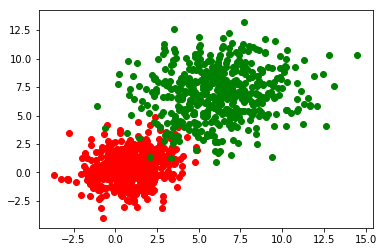

In [3]:
plt.scatter(dist_01[:, 0], dist_01[:, 1], c='red')
#plt.show()
plt.scatter(dist_02[:, 0], dist_02[:, 1], c='green')
plt.show()

In [4]:
# data matrix definition
rows = dist_01.shape[0] + dist_02.shape[0]
cols = dist_01.shape[1] + 1

data = np.zeros((rows, cols))
data[:dist_01.shape[0], :2] = dist_01
data[:dist_01.shape[0], -1] = 0.0

data[dist_01.shape[0]:, :2] = dist_02
data[dist_01.shape[0]:, -1] = 1.0
print data.shape
print np.max(data)

(1000, 3)
14.4644656772


In [5]:
np.random.shuffle(data)
print data[:10]

[[-1.52789076 -2.09642249  0.        ]
 [ 1.46717005  2.5623223   0.        ]
 [ 2.88820508  0.90011069  0.        ]
 [ 7.02634058  7.01719046  1.        ]
 [ 5.5996527   7.6067734   1.        ]
 [ 1.13476684 -2.62673862  0.        ]
 [ 7.01570544  5.97936816  1.        ]
 [ 2.2570632  -0.9642202   0.        ]
 [ 6.19448735  4.21022761  1.        ]
 [-0.82513503  1.86608391  0.        ]]


In [6]:
## Distance Function
def distance_euclid(pt1, pt2):
    d = np.sqrt(((pt1-pt2)**2).sum())
    return d
print distance_euclid(np.array([0.0, 0.0]), np.array([1.0, 1.0]))

## Manhattan Distance Function - Correction Here
def distance_manhat(pt1, pt2):
    #d = abs((pt1-pt2).sum())
    d = (abs(pt1-pt2)).sum()
    return d

print distance_manhat(np.array([-1.0, -1.0]), np.array([0.0, 0.0]))

1.41421356237
2.0


In [7]:
pt1 = np.array([0.0, 0.0])
pt2 = np.array([1.0, 1.0])
dist = 0
for ix in range(pt1.shape[0]):
    val = (pt1[ix] - pt2[ix])**2
    dist+=val
dist = np.sqrt(dist)
print dist

1.41421356237


In [8]:
## Testing and Training Split of the dataset
split = int(0.70*data.shape[0])
print split

train_x = data[:split, :2]
train_y = data[:split, -1]

test_x = data[split:, :2]
test_y = data[split:, -1]

print train_x.shape
print test_x.shape

#print np.unique(train_y, return_counts=True)
#print np.unique(test_y, return_counts=True)

print '------------'
freq = np.unique(train_y, return_counts=True)
print freq
print freq[0]
print freq[1]

print freq[1].max()
print freq[1].argmax()

ans = freq[0][freq[1].argmax()]
print ans

700
(700, 2)
(300, 2)
------------
(array([ 0.,  1.]), array([349, 351]))
[ 0.  1.]
[349 351]
351
1
1.0


In [9]:
def KNN(train_x, train_y, test_pt, k=5):
    vals = []
    for ix in range(train_x.shape[0]):
        d = distance_euclid(train_x[ix], test_pt)
        #d = distance_manhat(train_x[ix], test_pt)
        vals.append([d, train_y[ix]])
    
    sorted_vals = sorted(vals, key=lambda r:r[0])
    sorted_vals = np.array(sorted_vals)[:k]
    labels = sorted_vals[:,-1]
    freq = np.unique(labels, return_counts=True)
    ans = freq[0][freq[1].argmax()]
    
    return ans

In [10]:
test_pt1 = np.array([4.0, 4.5])
ans = KNN(train_x,train_y, test_pt1, k=5)
print ans

1.0


In [11]:
def get_acc(train_x, train_y, test_x, test_y, kx=5):
    preds = []
    for ix in range(test_x.shape[0]):
        p = KNN(train_x, train_y, test_x[ix], k=kx)
        preds.append(p)
    preds = np.array(preds)
    
    res = np.array(preds==test_y)
    print res.shape
    acc = 100*float((preds==test_y).sum())/test_y.shape[0]
    return acc

In [12]:
print get_acc(train_x, train_y, test_x, test_y, kx=5)

(300,)
97.6666666667
